# Datasets and Data Types
As a first look at data, we'll understand the basic layout of a dataset, the concepts of *features*, *observations*, and *response*, and the *types* of data (features) we'll come across in a dataset.  We'll also see some basics of the library [Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html), which is a powerful Python library for working with datasets, and [matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html), a data visualization library for Python.

In [1]:
# This module is part of the standard python library, it helps you write code that 
# accesses paths that aren't in the same OS as you are coding in.
from os import path

# Some basic imports and other commands; typically, these all get imported at the 
# beginning of your notebook when doing data work
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

plt.style.use("fivethirtyeight")

Let's load a dataset and clean it up.  The important line here is `pd.read_csv`, the other stuff is particular to this example.

In [2]:
# Get the appropriate filename to load.  Make sure the csv file is in a folder called
# `data`, one folder up from this one:
# <parent_folder>
# |-> data
# |-> <current_folder>
datapath = path.join('..', 'data', 'auto.csv')

# load the dataset as a Pandas DataFrame
df = pd.read_csv(datapath)

# basic cleaning
df.columns = [col.strip() for col in df.columns]
df['name'] = df['name'].apply(lambda x: x.replace('"', '').strip())

In [3]:
# Let's see the first 10 items in the dataset
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


## Datasets: Structure

Some things to note here:
* Datasets are arranged as a 2-dimensional grid (a *matrix*), where 
  * the **rows** are the individual **observations** of data (one "datum") and 
  * the **columns** are the **features** or **variables** that each observation has (or lacks)


* Some data can be *missing*, and what to do with that is a topic for much discussion.

In [4]:
# how many rows and columns are in this dataset?
df.shape

(397, 9)

In [5]:
# what are the basic statistics of each column?
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Data Types
The main types of features as I like to break them down are:
### <span style="color:red">Numerical</span> or <span style="color:red">Quantitative</span>
A feature whose values take on real numbers with an interpretable meaning as the value of a measurement of some characteristic of the data.  Examples include: 
* a measurement of length or another physical property of an object, or 
* a timestamp.
  
  
### <span style="color:green">Categorical</span> or <span style="color:green">Qualitative</span>
A feature whose values represent different categories describing the data.  There is no single, agreed upon way to order these categories, they are simply divisions of the data.  Typically there is only a finite number of categories, though that certainly isn't required.  Usually the smartest thing to do with these is separate your dataset into these categories.  Examples include:
* "female, male, nonbinary", or 
* "red, green, blue, or yellow", or 
* country of origin.
  
  
### <span style="color:blue">Ordinal</span>
A categorical feature whose values can be interpretted as having a clear order to them.  This should be viewed as an overlap between the above two options, and can often be treated as either in a data analysis.  Examples include: 
* student grade levels (9th, 10th, 11th, or 12th grade, *e.g.*), or 
* number of days in each week that it rained, or
* blood pressure categories ("Normal, Prehypertension, Hypertension (stage 1), Hypertension (stage 2)"). 

_______________

This isn't strictly a type of data in the usual sense, but I like to also have another feature type for organizational purposes:

### <span style="color:gray">Raw</span> or <span style="color:gray">Miscellaneous</span>
A feature in the dataset which may contain helpful information, but is not obviously any of the above options.  Examples include: 
  * the participants' name, or 
  * a paragraph from some book, or 
  * GPS coordinates (each of which would be *numerical* once split)
  
_______________

So, for the `Autos` dataset above:
![data_types_autos.png](data_types_autos.png)

But we can do more:

In [6]:
# you can create new columns from old:
def find_first_word(x):
    return x.split(' ')[0]

# Make another categorical feature
df['make'] = df['name'].map(find_first_word)

df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,make
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,ford
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,ford
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,chevrolet
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,plymouth
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,pontiac
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,amc


## A small exploration

For your <span style="color:red">numerical</span> features, it's typically helpful to make some graphs of it.

<AxesSubplot:>

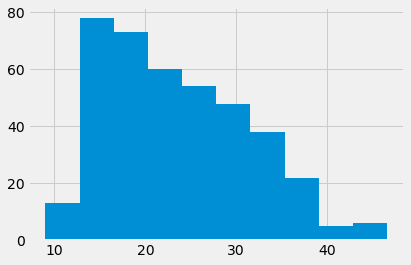

In [12]:
# you can always learn a ton about a dataset from some histograms
df['mpg'].hist()

<AxesSubplot:>

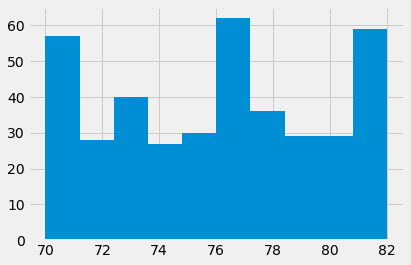

In [13]:
df['year'].hist()

<AxesSubplot:>

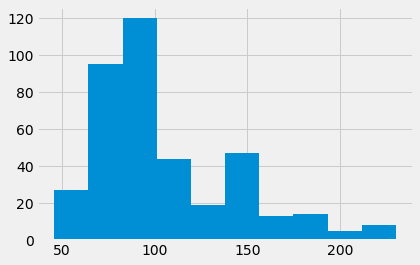

In [14]:
df['horsepower'].hist()

### Exploration: What is this feature?

After a quick check of this dataset, you probably feel pretty comfortable about most of the columns.  But what is `origin`?

In [7]:
# what values does this `origin` variable take?
df['origin'].unique()

array([1, 3, 2])

So, this could be <span style="color:blue">ordinal</span>, as the numbers suggest.

In [8]:
# How many of each type are there?
df['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

Let's try limiting our dataset based in this feature.

In [9]:
# You can use boolean indexing to slice your dataset!
just_the_ones = df[df['origin'] == 1]
just_the_ones['make'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'chevy', 'hi', 'mercury', 'oldsmobile', 'chrysler',
       'chevroelt', 'capri', 'cadillac'], dtype=object)

Any hypotheses?  

In [10]:
# Let's try another:
df[df['origin'] == 2]['make'].unique()

array(['volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'opel', 'fiat',
       'volvo', 'renault', 'vw', 'mercedes-benz', 'mercedes', 'vokswagen',
       'triumph'], dtype=object)

In [11]:
# And the last: 
df[df['origin'] == 3]['make'].unique()

array(['toyota', 'datsun', 'mazda', 'toyouta', 'maxda', 'honda', 'subaru',
       'nissan'], dtype=object)

This is a classic case of a <span style="color:green">categorical</span> feature masquerading as an <span style="color:blue">ordinal</span> one.  **Danger!** Don't just assume something that looks <span style="color:blue">ordinal</span> is in fact so!  This will add a great deal of noise to your models.  We'll learn what to do with these features eventually.